# Stratified Shuffle Split
This notebook implements Stratified Shuffle Split for detection (binary labels: 0 and 1).

File configuration

In [1]:
# Directory containing labeled slices files.
# Since all frac values have the same labels, any would do.
labeled_dir = "../scandata/slices loess frac=0.10_labeled"

DetectionNotClassification = False  # Set to True to replace all non-zero labels with 1

Libraries used:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit

Let's load labels.

In [3]:
# List all labeled files
labeled_files = [f for f in os.listdir(labeled_dir) if f.endswith("_slices_labeled.npy")]

# Option: Use all files (default)
selected_files = labeled_files

# Load only the labels from each selected file
all_labels = []
for labeled_file in selected_files:
    data = np.load(os.path.join(labeled_dir, labeled_file), allow_pickle=True).item()
    labels = data["labels"]
    if DetectionNotClassification:
        labels = (labels != 0).astype(int)
    all_labels.append(labels)

print("Loaded labels from files:")
for fname in selected_files:
    print(fname)
print(f"\nLoaded labels from {len(all_labels)} files.")

Loaded labels from files:
221111_144114__binary_onlylines114378to117271 loess frac=0.1_difference_slices_labeled.npy
221111_144114__binary_onlylines145900to148050 loess frac=0.1_difference_slices_labeled.npy
221111_144114__binary_onlylines25660to28100 loess frac=0.1_difference_slices_labeled.npy
221111_144114__binary_onlylines47178to50517 loess frac=0.1_difference_slices_labeled.npy
221111_144114__binary_onlylines86841to90142 loess frac=0.1_difference_slices_labeled.npy

Loaded labels from 5 files.


Let's see the distribution of labels per file.

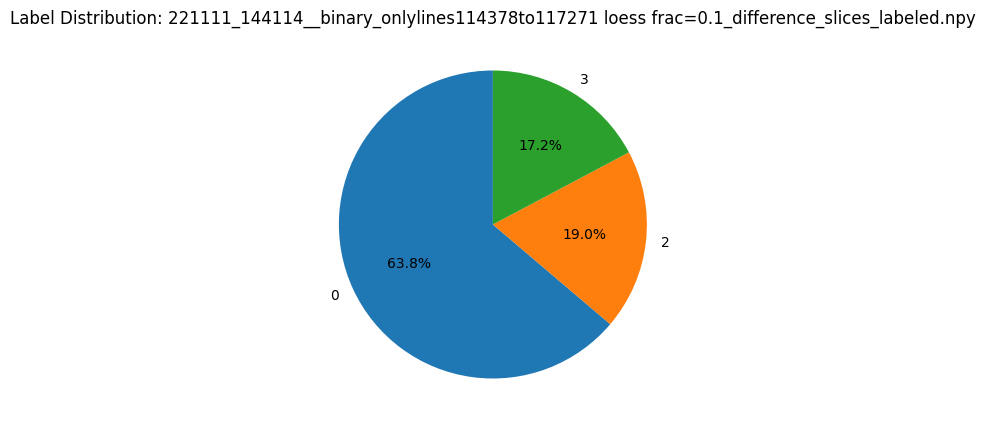

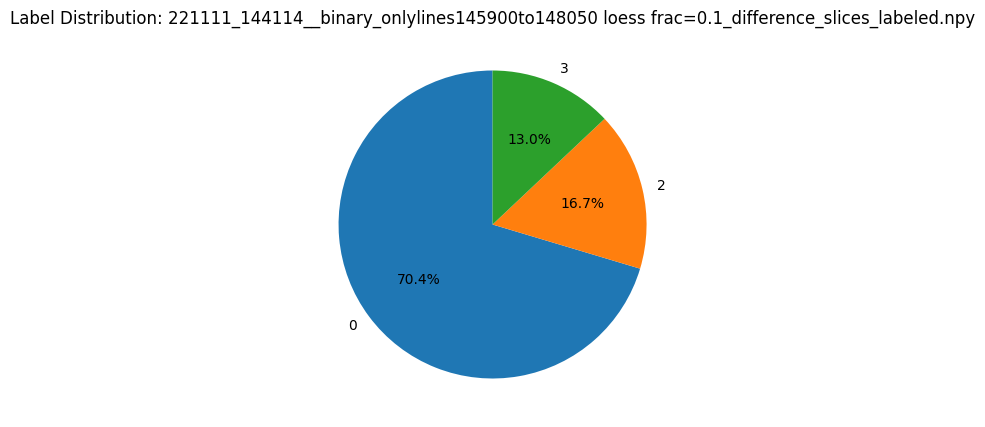

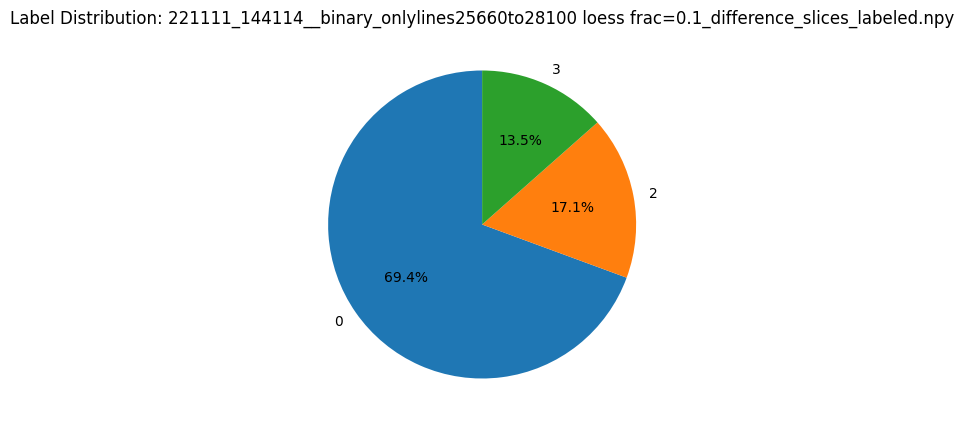

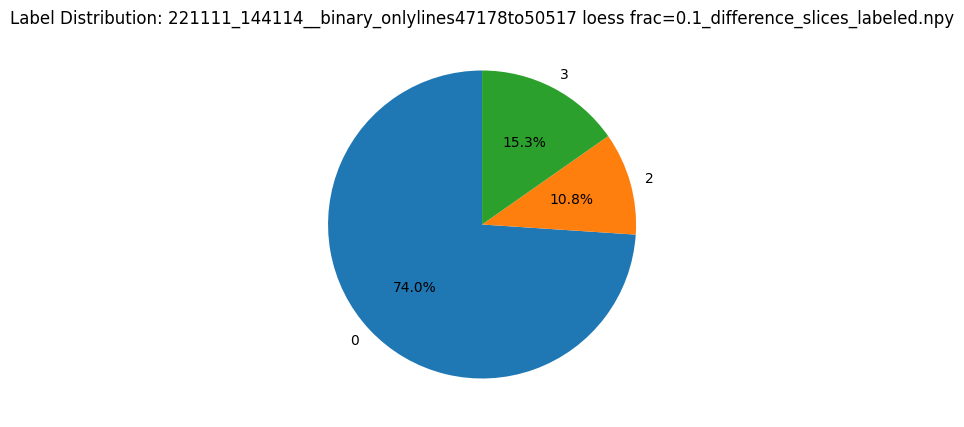

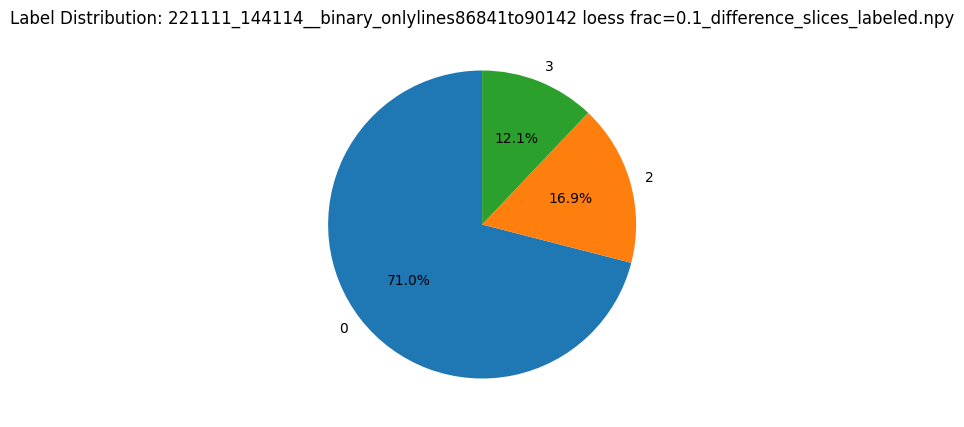

In [4]:
for labels, fname in zip(all_labels, selected_files):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=[str(u) for u in unique], autopct='%1.1f%%', startangle=90)
    plt.title(f"Label Distribution: {fname}")
    plt.show()

Using StratifiedShuffleSplit to create masks.

In [5]:
n_splits = 5  # Number of random splits
test_size = 0.2  # Fraction of data to use as validation
all_masks = []

for labels in all_labels:
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    masks = []
    for _, val_idx in sss.split(np.zeros_like(labels), labels):
        mask = np.zeros_like(labels, dtype=bool)
        mask[val_idx] = True
        masks.append(mask)
    all_masks.append(masks)

# Example: Show mask shapes for each file
for i, masks in enumerate(all_masks):
    print(f"File {selected_files[i]}: {[mask.sum() for mask in masks]} samples per split (validation set)")

# all_masks[file][split] gives a boolean mask for that file and split

File 221111_144114__binary_onlylines114378to117271 loess frac=0.1_difference_slices_labeled.npy: [np.int64(58), np.int64(58), np.int64(58), np.int64(58), np.int64(58)] samples per split (validation set)
File 221111_144114__binary_onlylines145900to148050 loess frac=0.1_difference_slices_labeled.npy: [np.int64(44), np.int64(44), np.int64(44), np.int64(44), np.int64(44)] samples per split (validation set)
File 221111_144114__binary_onlylines25660to28100 loess frac=0.1_difference_slices_labeled.npy: [np.int64(49), np.int64(49), np.int64(49), np.int64(49), np.int64(49)] samples per split (validation set)
File 221111_144114__binary_onlylines47178to50517 loess frac=0.1_difference_slices_labeled.npy: [np.int64(67), np.int64(67), np.int64(67), np.int64(67), np.int64(67)] samples per split (validation set)
File 221111_144114__binary_onlylines86841to90142 loess frac=0.1_difference_slices_labeled.npy: [np.int64(67), np.int64(67), np.int64(67), np.int64(67), np.int64(67)] samples per split (validat

An example of a boolean mask that yields proportionate distribution of labels between the train and the test splits of the dataset.

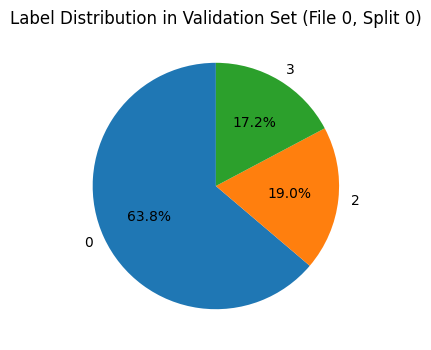

In [6]:
# Show distribution of labels under a specific mask (e.g., first file, first split)
labels = all_labels[0]
mask = all_masks[0][0]  # first file, first split

unique, counts = np.unique(labels[mask], return_counts=True)
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=[str(u) for u in unique], autopct='%1.1f%%', startangle=90)
plt.title("Label Distribution in Validation Set (File 0, Split 0)")
plt.show()

Save all_masks to a file

In [7]:
np.save("stratified_shuffle_masks.npy", np.array(all_masks, dtype=object), allow_pickle=True)
print("Saved masks to stratified_shuffle_masks.npy")

Saved masks to stratified_shuffle_masks.npy
